<img align="right" width="320" src="http://www.sobigdata.eu/sites/default/files/SoBigData_RI_3.png">

**Author:** [Riccardo Guidotti](http://kdd.isti.cnr.it/people/riccardo-guidotti), Salvatore Citraro  
**Python version:**  3.x

<img align="right" width="250" src="https://nullpointerexception1.files.wordpress.com/2017/11/decision-tree-e1513448957591.jpg?w=1400&h=9999">

# Classification with Python

This notebook contains an overview of basic python functionalities for classification using the [sklearn](http://scikit-learn.org/stable/) library.  
Note: this notebook is purposely not 100% comprehensive, it only discusses the basic things you need to get started.

Import of the basic packages to use

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Glasgow Norms

In [3]:
df = pd.read_csv("../data/words_glasgow.csv", skipinitialspace=True, sep=',')
df.head()

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
0,abattoir,8,4.200,2.864,4.333,5.455,4.391,2.382,6.760,4.652,5.391,0,160074.0
1,abbey,5,3.125,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303,0,4224864.0
2,abbreviate,10,3.273,5.250,5.235,3.286,3.177,5.121,5.543,2.667,3.971,0,140105.0
3,abdicate,8,4.194,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167,0,124123.0
4,abdication,10,3.846,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571,0,128143.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4682 entries, 0 to 4681
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   word             4682 non-null   object 
 1   length           4682 non-null   int64  
 2   arousal          4682 non-null   float64
 3   valence          4682 non-null   float64
 4   dominance        4682 non-null   float64
 5   concreteness     4682 non-null   float64
 6   imageability     4682 non-null   float64
 7   familiarity      4682 non-null   float64
 8   aoa              4682 non-null   float64
 9   semsize          4682 non-null   float64
 10  gender           4682 non-null   float64
 11  polysemy         4682 non-null   int64  
 12  web_corpus_freq  4668 non-null   float64
dtypes: float64(10), int64(2), object(1)
memory usage: 475.6+ KB


Since classification is a ***supervised*** task we are interested in knowing the distribution of the target class.

In [5]:
df['polysemy'].value_counts()

0    4303
1     379
Name: polysemy, dtype: int64

Sometimes is useful to map a set of string into a set of integers.

## Classification Objective

Given a collection of records called ***training set*** where each record contains a set of ***attributes*** and one of the attributes is the ***target class***. The objective of classification is to find a model for the class attribute as a function of the values of other attributes.

The ***goal*** is to assign to a class previously unseen records as accurately as possible.
A ***test set*** is used to determine the accuracy of the model. 

Usually, the given data set is divided into training and test sets, with training set used to build
the model and test set used to validate it.

<img align="center" width="650" src="http://images.slideplayer.com/15/4732696/slides/slide_4.jpg"> 

## Classification Techniques
* ***Decision Tree***
* ***Instance-based methods***
* Rule-based methods
* Neural Networks
* Naïve Bayes and Bayesian Belief Networks
* Support Vector Machines (SVM)

## Evaluating the Performance of a Classifier

In order to evaluate the quality of classification there exist several measures: all of them built upon the concept of **Confusion Matrix**.

**Confusion Matrix**
In the field of machine learning a confusion matrix is a specific table layout that allows visualization of the performance of an algorithm. Each row of the matrix represents the instances in a predicted class while each column represents the instances in an actual class (or vice versa).

<img align="right" width="300" src="https://rasbt.github.io/mlxtend/user_guide/evaluate/confusion_matrix_files/confusion_matrix_1.png">

Given a Target class:
* ***True Positive (TP)*** represent those instances correctly predicted to be True
* ***False Positive (FP)*** represent those instances incorrectly predicted to be True
* ***True Negative (TN)*** represent those instances correctly predicted to be False
* ***False Negative (FT)*** represent those instances incorrectly predicted to be False 

Upon such classes are built several indicators.
Among the otehrs, two scores characterize the outcome of a predictive model: ***precision*** and ***recall***

* **Precision**: how many of the instances I predict to be True are really True? $\mathit{precision} = \frac{TP}{TP+FP}$
* **Recall**: how many True instances I was able to correctly predict? $\mathit{recall} = \frac{TP}{TP+FN}$

To summarize the overall performance of a model we can also use the ***accuracy*** and the ***f1-score***: 

* The **accuracy** $= \frac{TP+TN}{TP+TN+FP+FN}$ captures the number of instances correctly classified above all
* $1-\mathit{accuracy}$ gives the errore rate, i.e., the error committed by the classifier.
* The **f1-score** $= \frac{2TP}{2TP+FP+FN}$ describes the armonic mean of precision and recall.

All these indicators are provided by [sklearn](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

In [6]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Decision Tree

## Example of Decision Tree and Application
<img align="left" width="490" src="http://images.slideplayer.com/15/4732696/slides/slide_10.jpg">
<img align="right" width="490" src="http://images.slideplayer.com/15/4732696/slides/slide_13.jpg">

## The Algorithm in a Nutshell

**Objective:** Build the most accurate decision tree.

Given a set $D$ of training records.  
* If $D_x$ contains records that belong the same class $y$, then this is a leaf node labeled as $y$;
* If $D_x$ contains records that belong to more than one class, use the **best attribute** to split the data into smaller subsets $D_1, \dots D_k$.
* Recursively apply the procedure to each subset.

How to determine the best split: nodes with ***homogeneous*** class distribution are preferred.  
Thus, a measure of node ***impurity*** is required. Example of impurity nodes:
* Gini Index
* Entropy
* Misclassification error

How to determine when to stop splitting: there are various ***stopping criteria***:
* Stop expanding a node when all the records belong to the same class
* Stop expanding a node when all the records have similar attribute values
* Early termination (to be discussed later) 

> Tan, P. N. (2006). Introduction to data mining. Pearson Education India.

Running [example](http://matlaspisa.isti.cnr.it:5055/Decision%20Tree)
Wikipedia [link](https://en.wikipedia.org/wiki/Decision_tree)

## Classification Problems

* Missing values: sophisticatd techniques are required to handle missing values
* The sklearn library does not allow missing values.
* Overfitting: the model is too accurate on the training data but its performance are poor on the test data.
* For a Decision Trees it means that the tree is more complex and deep than necessary.

## Decision Tree in Python  ([sklearn](http://scikit-learn.org/stable/modules/tree.html))

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

Split the dataset into train and test

In [8]:
target = 'polysemy'

to_drop = [target, 'word', 'web_corpus_freq']
attributes = [col for col in df.columns if col not in to_drop]

X = df[attributes].values
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

Build the decision tree

Parameters:
* **criterion** (default 'gini'): The function to measure the quality of a split. Available: gini, entropy.
* **max_depth** (default None): The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
* **min_samples_split** (default 2): The minimum number of samples required to split an internal node.
* **min_samples_leaf** (default 1): The minimum number of samples required to be at a leaf node.

In [9]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1)
clf = clf.fit(X_train, y_train)

Output:
* **feature\_importances_**: The feature importances. The higher, the more important the feature.
* **tree_**: The underlying Tree object.

Features Importance

In [10]:
for col, imp in zip(attributes, clf.feature_importances_):
    print(col, imp)

length 0.07147981196477703
arousal 0.1130154478518323
valence 0.07575911204335266
dominance 0.1156165093287352
concreteness 0.11805463182271714
imageability 0.07623838035066727
familiarity 0.07043963584569395
aoa 0.13124878798854073
semsize 0.12986505065408183
gender 0.09828263214960206


Visualize the decision tree

In [11]:
import pydotplus
from sklearn import tree
from IPython.display import Image

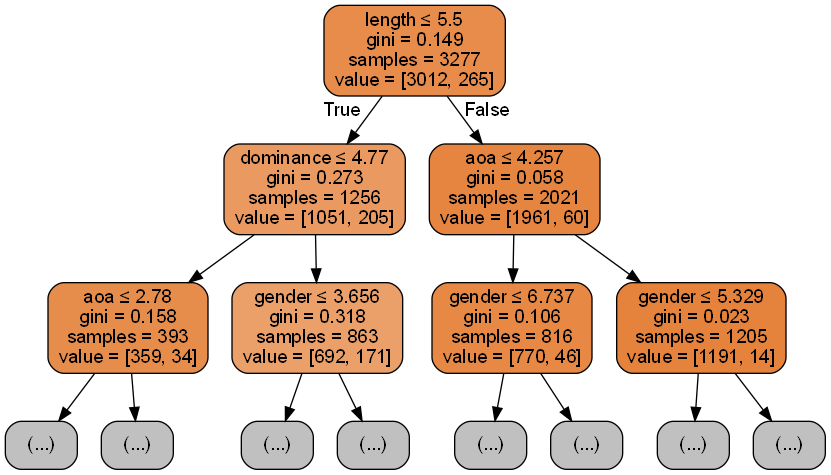

In [12]:
dot_data = tree.export_graphviz(clf, out_file=None,  feature_names=attributes,
                                #class_names=clf.classes_,  
                                filled=True, rounded=True,  special_characters=True, max_depth=2)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

Apply the decision tree on the training set

In [13]:
y_pred = clf.predict(X_train)

Apply the decision tree on the test set and evaluate the performance

In [14]:
y_pred = clf.predict(X_test)

In [15]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8661921708185053
F1-score [0.92713178 0.1826087 ]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1291
           1       0.18      0.18      0.18       114

    accuracy                           0.87      1405
   macro avg       0.55      0.56      0.55      1405
weighted avg       0.87      0.87      0.87      1405



In [16]:
cf = confusion_matrix(y_test, y_pred)
cf

array([[1196,   95],
       [  93,   21]], dtype=int64)

In [17]:
cf[0][0], cf[0][1], cf[1][0], cf[1][1] # TN, FP, FN, TP

(1196, 95, 93, 21)

In [18]:
cf = confusion_matrix(y_test, y_pred, labels=[1,0])
cf

array([[  21,   93],
       [  95, 1196]], dtype=int64)

In [19]:
cf[0][0], cf[0][1], cf[1][0], cf[1][1] # TP, FN, FP, TN

(21, 93, 95, 1196)

In [20]:
y_score = clf.predict_proba(X_test)

In [21]:
fpr, tpr, tresh = roc_curve(y_test, y_score[:,1])
roc_auc = auc(fpr, tpr)
print(roc_auc)

roc_auc = roc_auc_score(y_test, y_pred)

0.5553120795792735


In [22]:
tresh

array([2., 1., 0.])

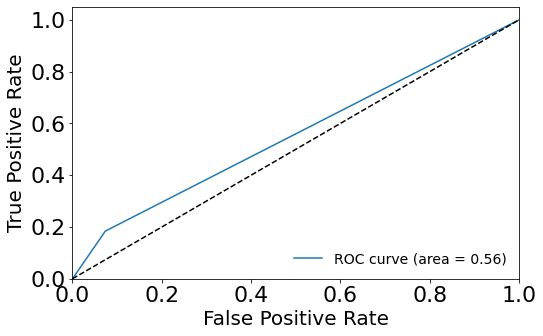

In [23]:
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20) 
plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.show()

### Cross Validation  
More options at [link](http://scikit-learn.org/stable/modules/cross_validation.html#)

In [24]:
from sklearn.model_selection import cross_val_score

In [25]:
scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X, y, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.8605 (+/- 0.03)
F1-score: 0.5508 (+/- 0.09)


### Tuning the hyper-parameters

More options at [link](http://scikit-learn.org/stable/modules/grid_search.html#grid-search)

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [27]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [28]:
param_list = {'min_samples_split': [2, 5, 10, 20],
              'min_samples_leaf': [1, 5, 10, 20],
             }

grid_search = GridSearchCV(clf, param_grid=param_list)
grid_search.fit(X, y)
clf = grid_search.best_estimator_

In [29]:
report(grid_search.cv_results_, n_top=3)

Model with rank: 1
Mean validation score: 0.908 (std: 0.006)
Parameters: {'min_samples_leaf': 20, 'min_samples_split': 2}

Model with rank: 1
Mean validation score: 0.908 (std: 0.006)
Parameters: {'min_samples_leaf': 20, 'min_samples_split': 5}

Model with rank: 1
Mean validation score: 0.908 (std: 0.006)
Parameters: {'min_samples_leaf': 20, 'min_samples_split': 10}

Model with rank: 1
Mean validation score: 0.908 (std: 0.006)
Parameters: {'min_samples_leaf': 20, 'min_samples_split': 20}



In [30]:
param_list = {'max_depth': [None] + list(np.arange(2, 20)),
              'min_samples_split': [2, 5, 10, 20, 30, 50, 100],
              'min_samples_leaf': [1, 5, 10, 20, 30, 50, 100],
             }

random_search = RandomizedSearchCV(clf, param_distributions=param_list, n_iter=100)
random_search.fit(X, y)
clf = random_search.best_estimator_

In [31]:
report(random_search.cv_results_, n_top=3)

Model with rank: 1
Mean validation score: 0.919 (std: 0.000)
Parameters: {'min_samples_split': 20, 'min_samples_leaf': 20, 'max_depth': 3}

Model with rank: 1
Mean validation score: 0.919 (std: 0.000)
Parameters: {'min_samples_split': 50, 'min_samples_leaf': 20, 'max_depth': 2}

Model with rank: 1
Mean validation score: 0.919 (std: 0.000)
Parameters: {'min_samples_split': 30, 'min_samples_leaf': 100, 'max_depth': 9}

Model with rank: 1
Mean validation score: 0.919 (std: 0.000)
Parameters: {'min_samples_split': 20, 'min_samples_leaf': 20, 'max_depth': 5}

Model with rank: 1
Mean validation score: 0.919 (std: 0.000)
Parameters: {'min_samples_split': 30, 'min_samples_leaf': 100, 'max_depth': 5}

Model with rank: 1
Mean validation score: 0.919 (std: 0.000)
Parameters: {'min_samples_split': 20, 'min_samples_leaf': 100, 'max_depth': 17}

Model with rank: 1
Mean validation score: 0.919 (std: 0.000)
Parameters: {'min_samples_split': 2, 'min_samples_leaf': 100, 'max_depth': 3}

Model with rank:

## Any other Sklearn classifier can be used in the same way

Let see two examples: Random Forest and K-Nearest Neighbor

# Random Forest

Sklearn [link](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) for more details.

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, 
                             min_samples_split=2, min_samples_leaf=1, class_weight=None)

scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X, y, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.9176 (+/- 0.00)
F1-score: 0.4787 (+/- 0.00)


# K-Nearest Neighbors

Sklearn [link](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) for more details.

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
clf = KNeighborsClassifier(n_neighbors=5)

scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X, y, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.9043 (+/- 0.02)
F1-score: 0.5262 (+/- 0.07)
